<a href="https://colab.research.google.com/github/Nikhil5566/Machine-Learning/blob/main/ML_Project_3_Pima_Indians_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

#ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Installing Kaggle API
!pip install -q kaggle

# Uploading kaggle.json
from google.colab import files
files.upload()

# Moving kaggle.json to ~/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloading the dataset using Kaggle API
!kaggle datasets download -d uciml/pima-indians-diabetes-database

# Unziping the downloaded file
!unzip pima-indians-diabetes-database.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 18.2MB/s]
Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Select features and target
features = ['Glucose', 'BMI', 'Age']
target = 'Outcome'

In [ ]:
# Replace 0 values with mean for Glucose and BMI (0 is unrealistic)
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

# Spliting the dataset

In [ ]:
X = df[features]
y = df[target]

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)


Model Accuracy: 0.75


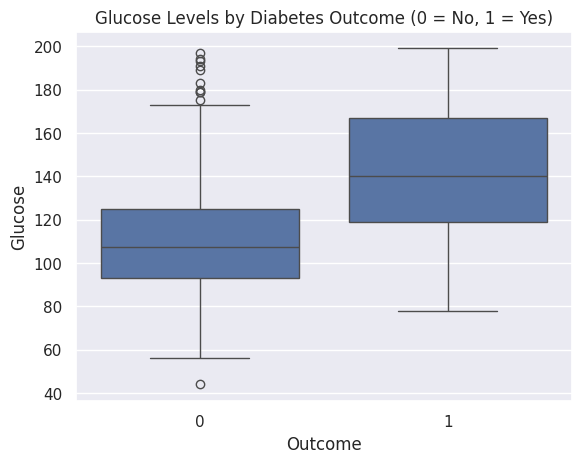

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Visualize Glucose vs. Outcome
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Levels by Diabetes Outcome (0 = No, 1 = Yes)')
plt.show()


-----------Classification Report:-----------
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



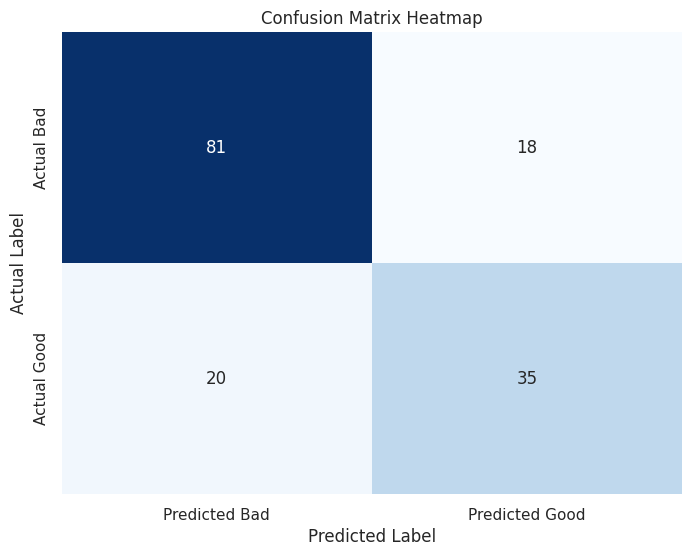

In [ ]:
print("\n-----------Classification Report:-----------")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Bad', 'Predicted Good'],
            yticklabels=['Actual Bad', 'Actual Good'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Thank you